In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [53]:
# Lee el CSV en un DataFrame de pandas
df = pd.read_csv('/home/victhor/bcnemotorsport/ws/src/ec-thor/data/cluster_figure.csv')
df.describe

<bound method NDFrame.describe of        id         x        y         z  i
0       0  -5.71133 -13.5094  0.020306  0
1       0  -5.75036 -13.4995  0.134549  0
2       0  -5.76175 -13.5062  0.199953  0
3       0  -5.76109 -13.4931  0.135113  0
4       0  -5.77249 -13.4998  0.200704  0
...    ..       ...      ...       ... ..
12474  84  24.40190 -31.1642 -0.585613  0
12475  84  24.54910 -31.1248 -0.265918  0
12476  84  24.49510 -31.0304 -0.579738  0
12477  84  24.49510 -31.1470 -0.595600  0
12478  84  24.52900 -31.0995 -0.267716  0

[12479 rows x 5 columns]>

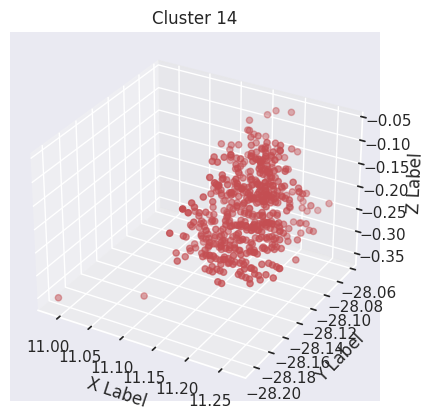

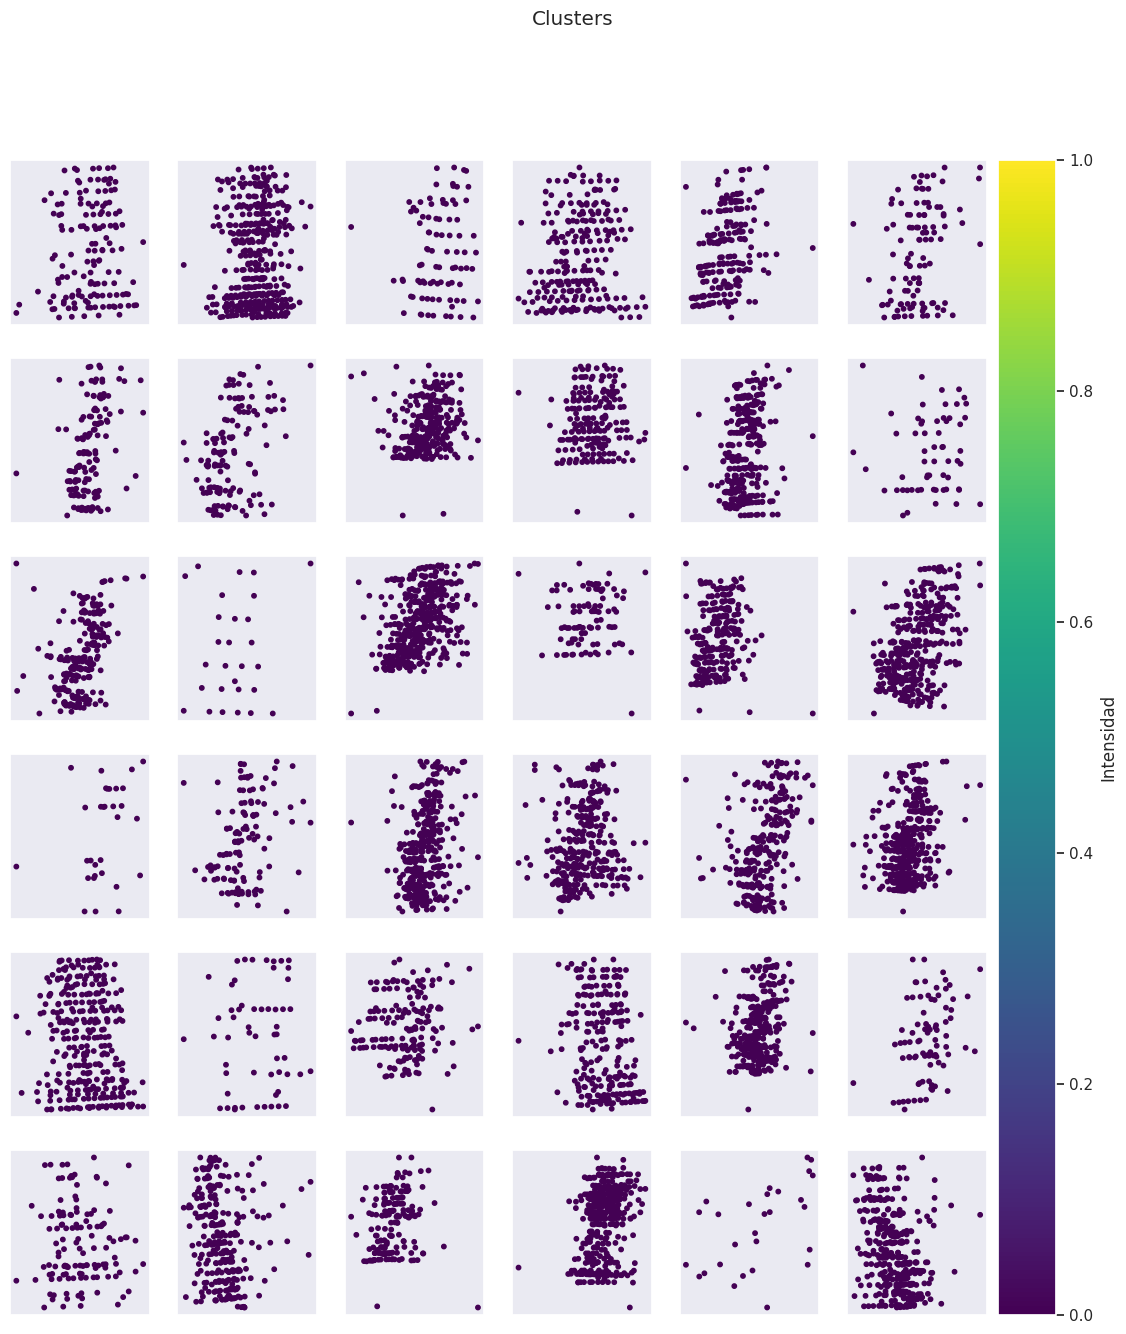

In [54]:
# Visualiza un cluster en 3D
def plot_cluster(cluster_id):
    cluster = df[df['id'] == cluster_id]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(cluster['x'], cluster['y'], cluster['z'], c='r', marker='o')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.title(f'Cluster {cluster_id}')
    plt.show()

# Visualiza una tabla de 3x3 con clusters
def plot_cluster_grid():
    fig, axs = plt.subplots(6, 6, figsize=(15, 15))
    fig.suptitle('Clusters')

    for cluster_id in range(36):
        cluster = df[df['id'] == cluster_id]
        axs[cluster_id // 6, cluster_id % 6].scatter(cluster['y'], cluster['z'], c=cluster['i'], cmap='viridis', marker='o', s=10)
        # axs[cluster_id // 6, cluster_id % 6].axis('off')  # Elimina los ejes
        axs[cluster_id // 6, cluster_id % 6].set_xticks([])  # Elimina los ticks del eje x
        axs[cluster_id // 6, cluster_id % 6].set_yticks([])  # Elimina los ticks del eje y

    # Añade una barra de color común para todos los subgráficos
    cbar = fig.colorbar(axs[0, 0].scatter([], [], c=[], cmap='viridis', marker='o', s=10), ax=axs, pad=0.01)
    cbar.set_label('Intensidad')

    plt.show()

# Prueba visualizar un cluster específico
plot_cluster(14)

# Prueba visualizar la tabla de clusters
plot_cluster_grid()


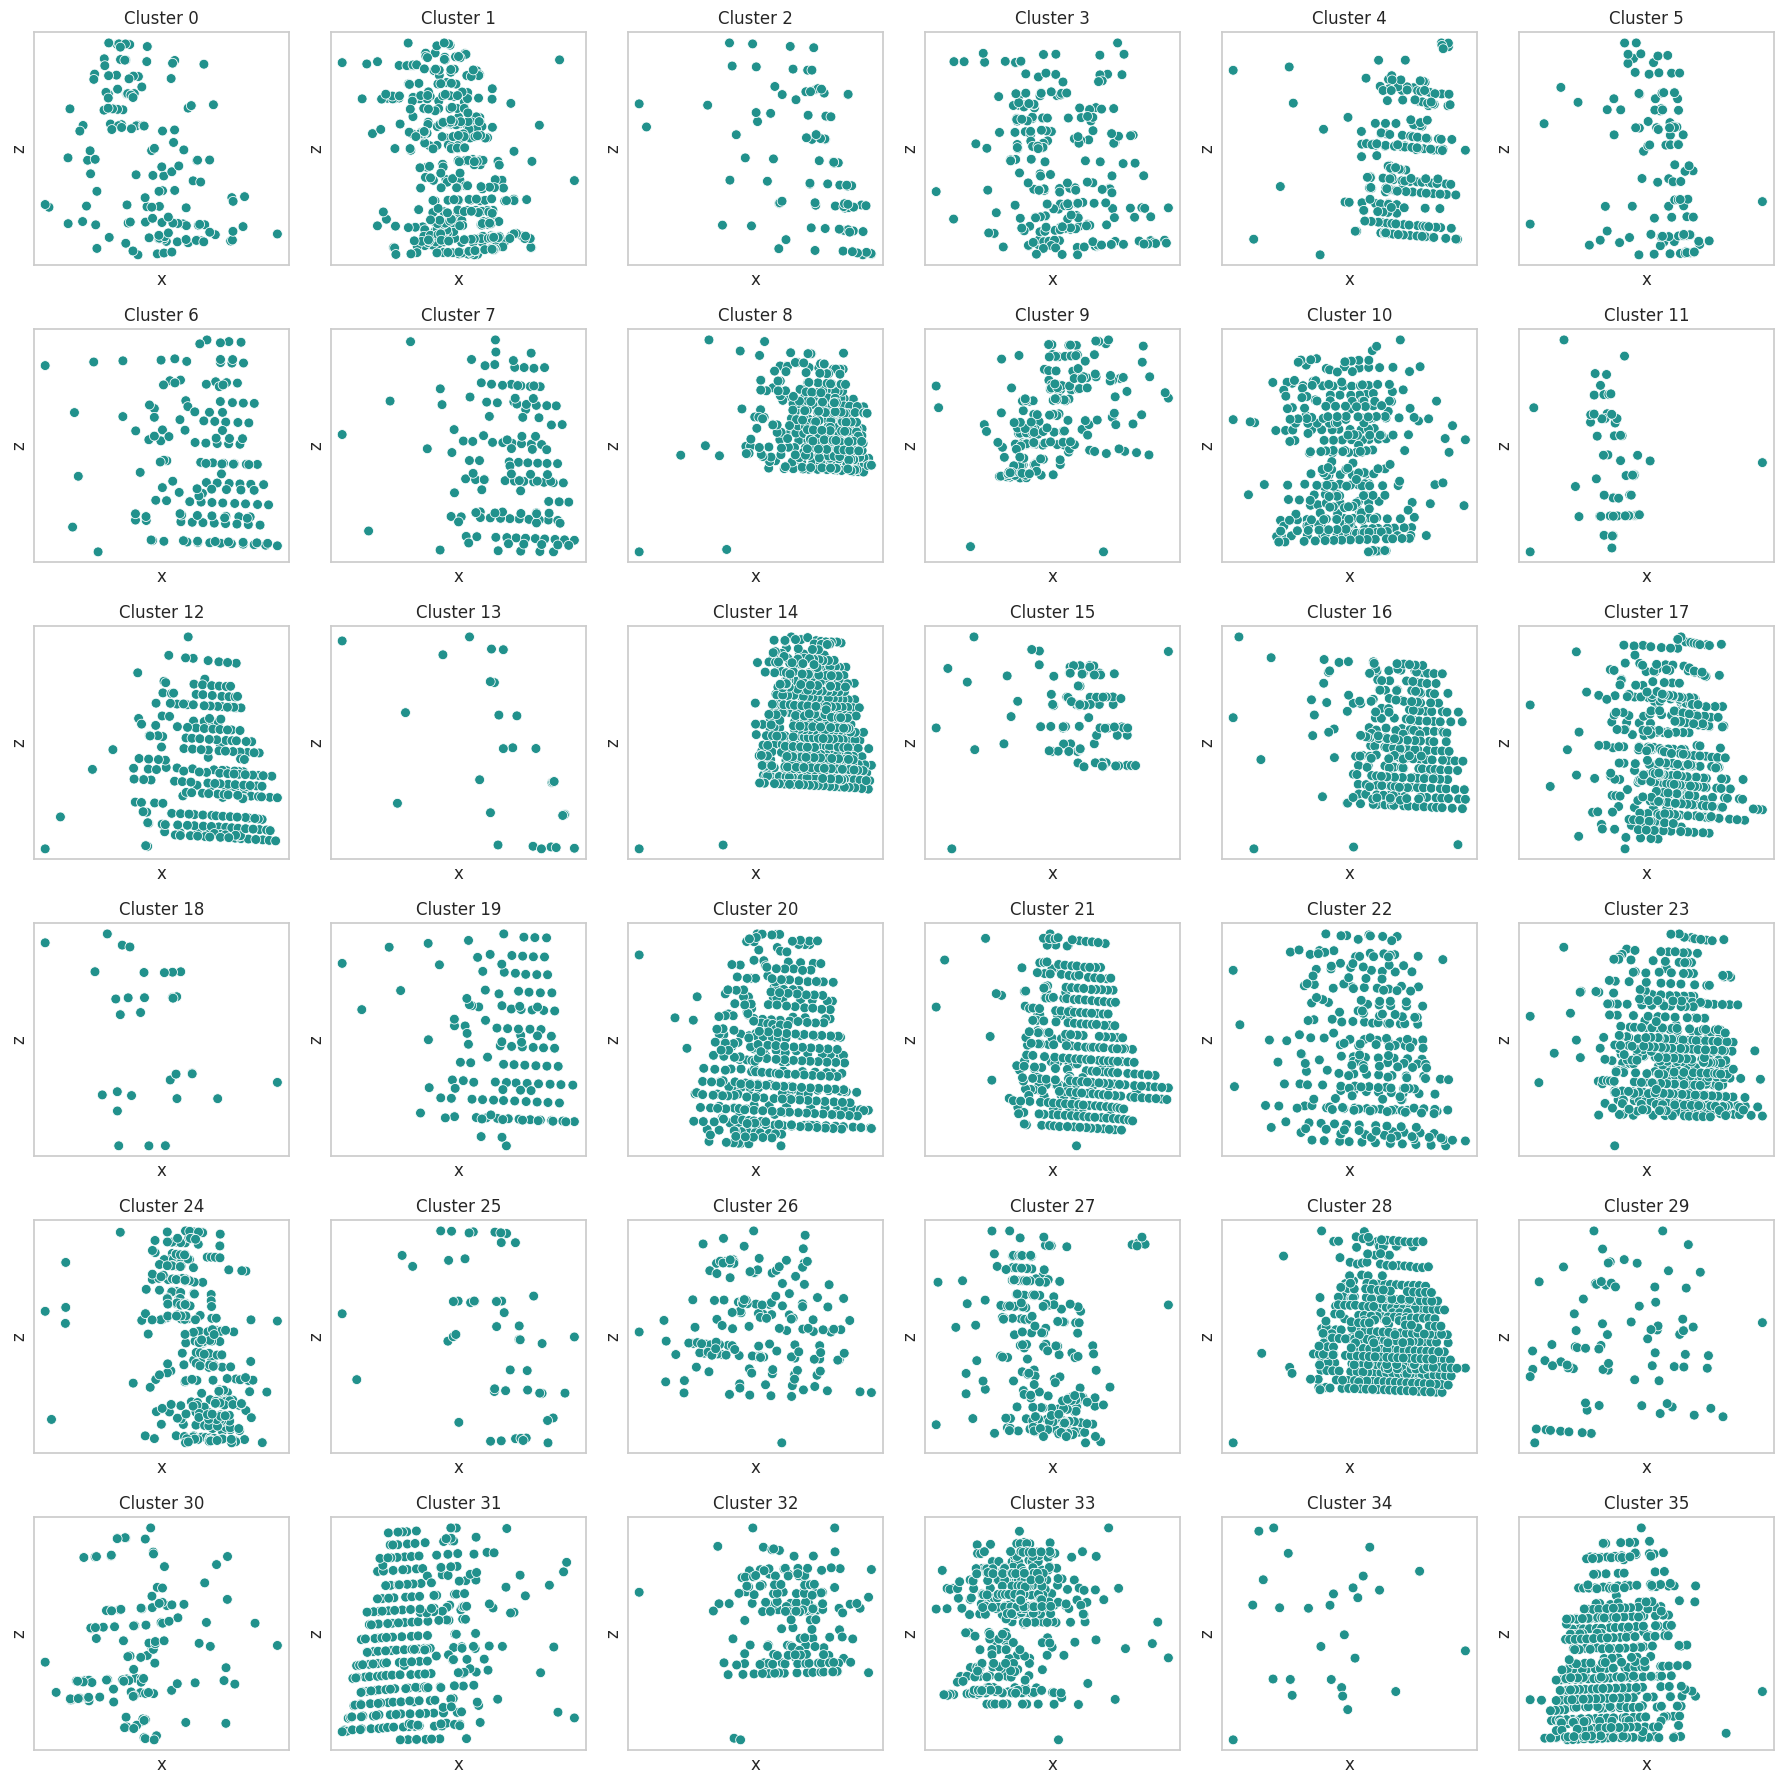

In [55]:
# Crear una función para plotear cada cluster
sns.set(style="whitegrid")
custom_palette = sns.color_palette("coolwarm", as_cmap=True)


def plot_cluster(cluster_data, cluster_id, ax):
    sns.scatterplot(x='x', y='z', hue='i', data=cluster_data, palette='viridis', ax=ax, legend=False, s=50)
    ax.set_xticks([])  # Ocultar marcas en el eje x
    ax.set_yticks([])  # Ocultar marcas en el eje y
    ax.set_title(f'Cluster {cluster_id}')  # Añadir el título del cluster

# Configuración de la parrilla
num_rows, num_cols = 6, 6
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 18))

# Iterar sobre cada cluster y plotearlo en la parrilla
unique_ids = df['id'].unique()
for i in range(min(len(unique_ids), num_rows * num_cols)):
    cluster_id = unique_ids[i]
    cluster_data = df[df['id'] == cluster_id]
    row, col = divmod(i, num_cols)
    plot_cluster(cluster_data, cluster_id, axes[row, col])

# Ajustes de diseño
plt.tight_layout()
plt.show()

<Axes: >

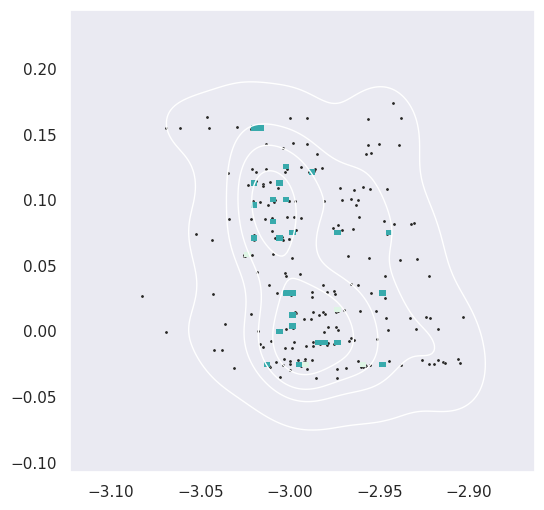

In [56]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

cluster_data = df[df['id'] == 3]
x,z = x, z = cluster_data['x'].values, cluster_data['z'].values

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=z, s=5, color=".15")
sns.histplot(x=x, y=z, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=z, levels=5, color="w", linewidths=1)

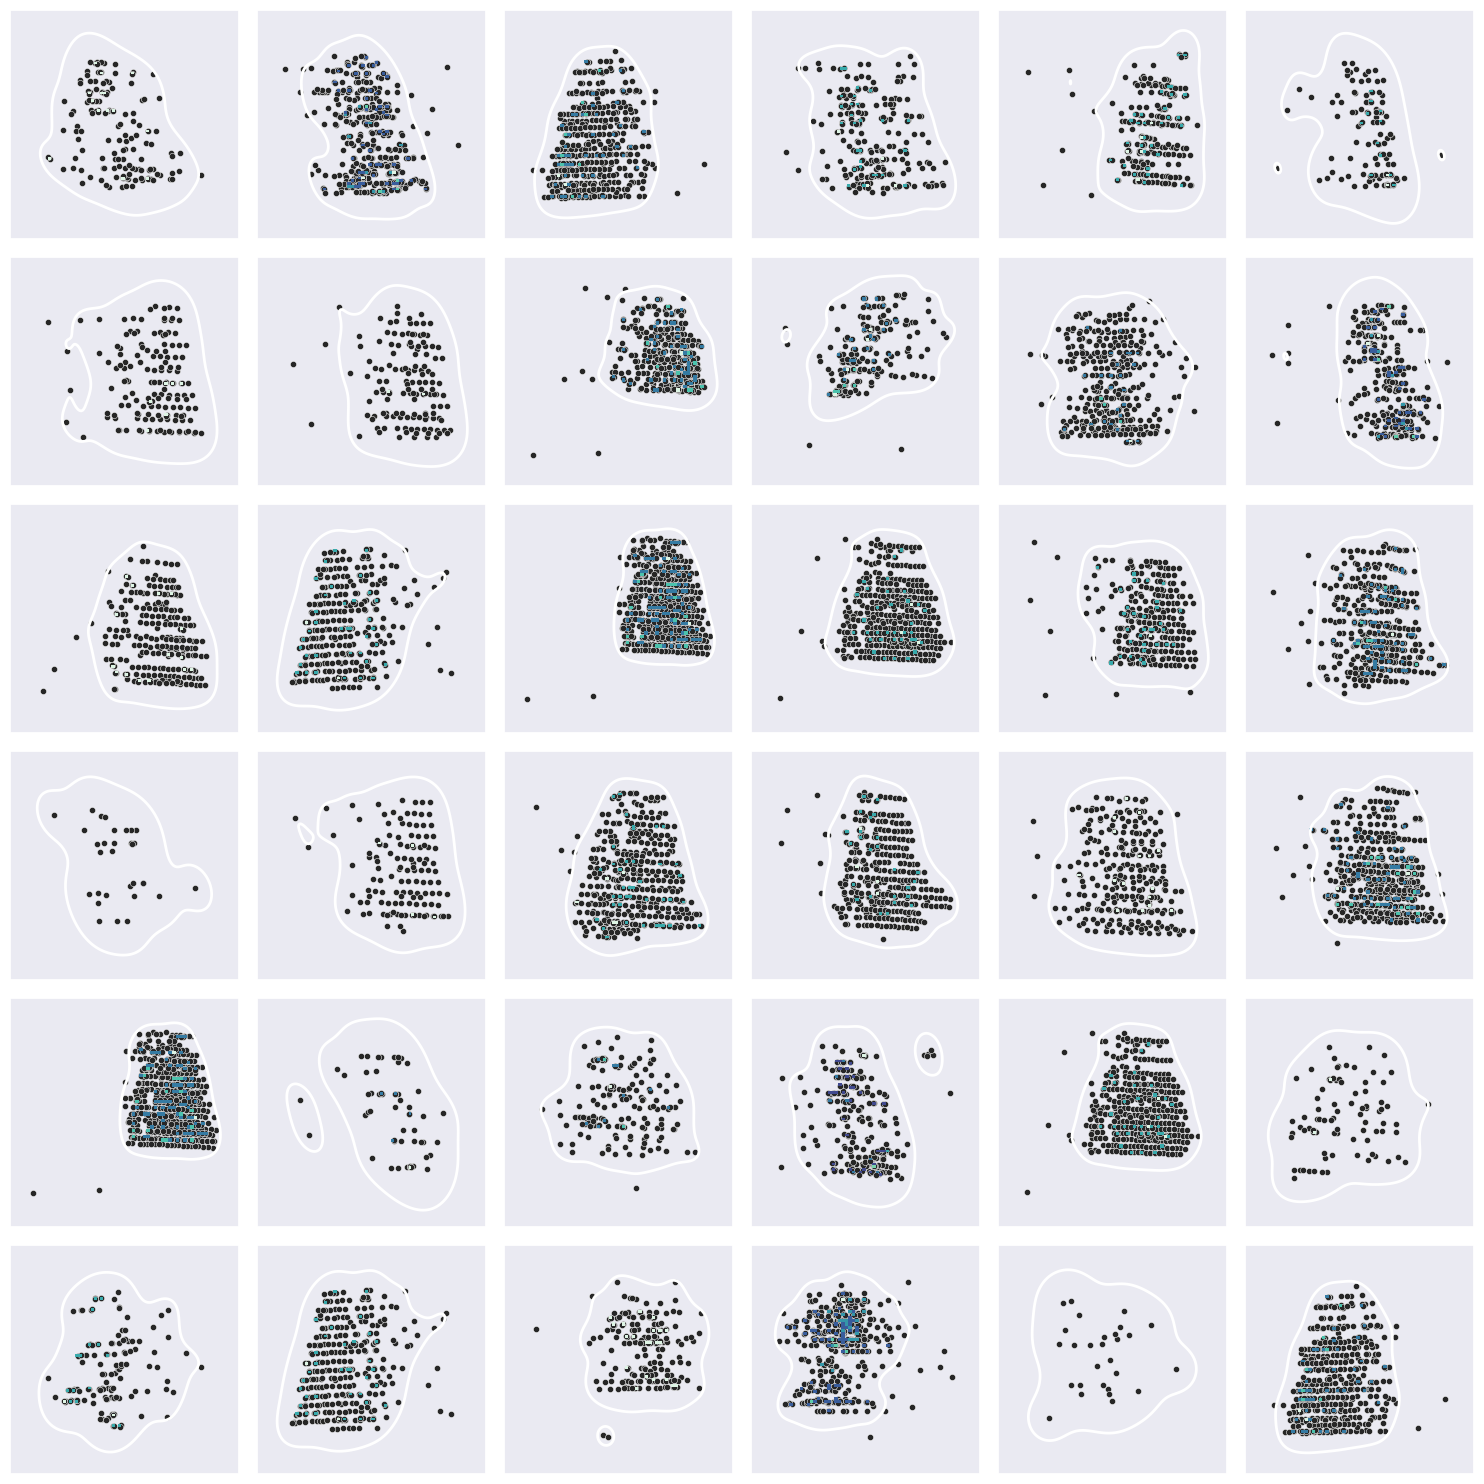

In [57]:
# Configurar el estilo de seaborn (opcional)
sns.set_theme(style="dark")

# Configuración de la parrilla
num_rows, num_cols = 6, 6
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterar sobre cada id y plotearlo en la parrilla
unique_ids = df['id'].unique()
select_ids = [0, 1, 35 ,3 , 4, 5, 
              6, 7, 8, 9, 10, 24,
              12, 31, 14 ,28,16,17,
              18, 19, 20,21,22,23,
              14, 25, 26,27,28,29,
              30, 31, 32 ,33 , 34, 35]

for i, cluster_id in enumerate(select_ids):
    cluster_data = df[df['id'] == cluster_id]
    x, z = cluster_data['x'].values, cluster_data['z'].values
    row, col = divmod(i, num_cols)
    
    # Draw a combo histogram and scatterplot with density contours
    sns.scatterplot(x=x, y=z, s=20, color=".15", ax=axes[row, col])
    sns.histplot(x=x, y=z, bins=50, pthresh=.3, cmap="mako", ax=axes[row, col])
    sns.kdeplot(x=x, y=z, levels=2, color="w", linewidths=2, ax=axes[row, col])

    # Ocultar marcas de ejes para una presentación más limpia
    axes[row, col].set_xticks([])
    axes[row, col].set_yticks([])

# Ajustes de diseño
plt.tight_layout()
plt.show()

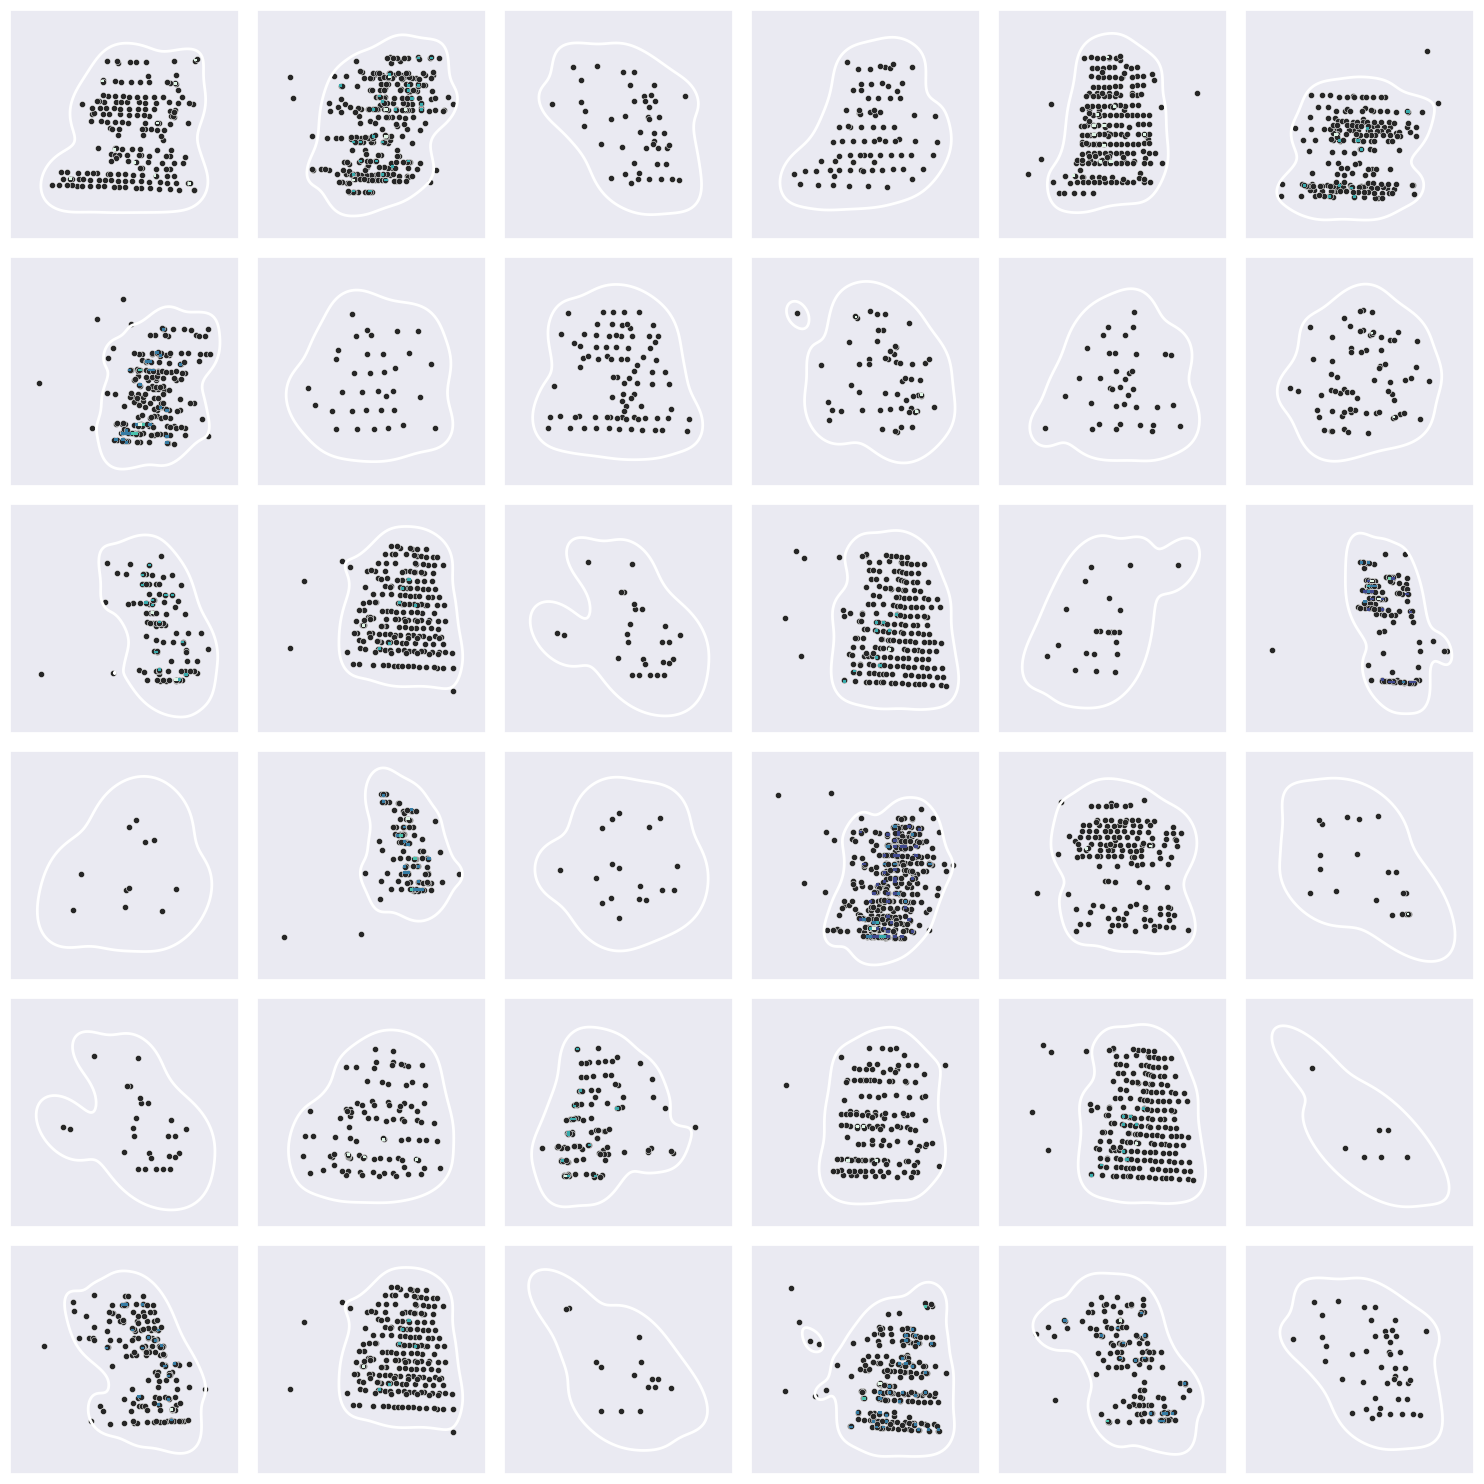

In [58]:
df = pd.read_csv('/home/victhor/bcnemotorsport/ws/src/ec-thor/data/cluster.csv')
# Configurar el estilo de seaborn (opcional)
sns.set_theme(style="dark")

# Configuración de la parrilla
num_rows, num_cols = 6, 6
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterar sobre cada id y plotearlo en la parrilla
unique_ids = df['id'].unique()
for i, cluster_id in enumerate(select_ids):
    cluster_data = df[df['id'] == cluster_id]
    x, z = cluster_data['x'].values, cluster_data['z'].values
    row, col = divmod(i, num_cols)
    
    # Draw a combo histogram and scatterplot with density contours
    sns.scatterplot(x=x, y=z, s=20, color=".15", ax=axes[row, col])
    sns.histplot(x=x, y=z, bins=50, pthresh=.3, cmap="mako", ax=axes[row, col])
    sns.kdeplot(x=x, y=z, levels=2, color="w", linewidths=2, ax=axes[row, col])

    # Ocultar marcas de ejes para una presentación más limpia
    axes[row, col].set_xticks([])
    axes[row, col].set_yticks([])

# Ajustes de diseño
plt.tight_layout()
plt.show()

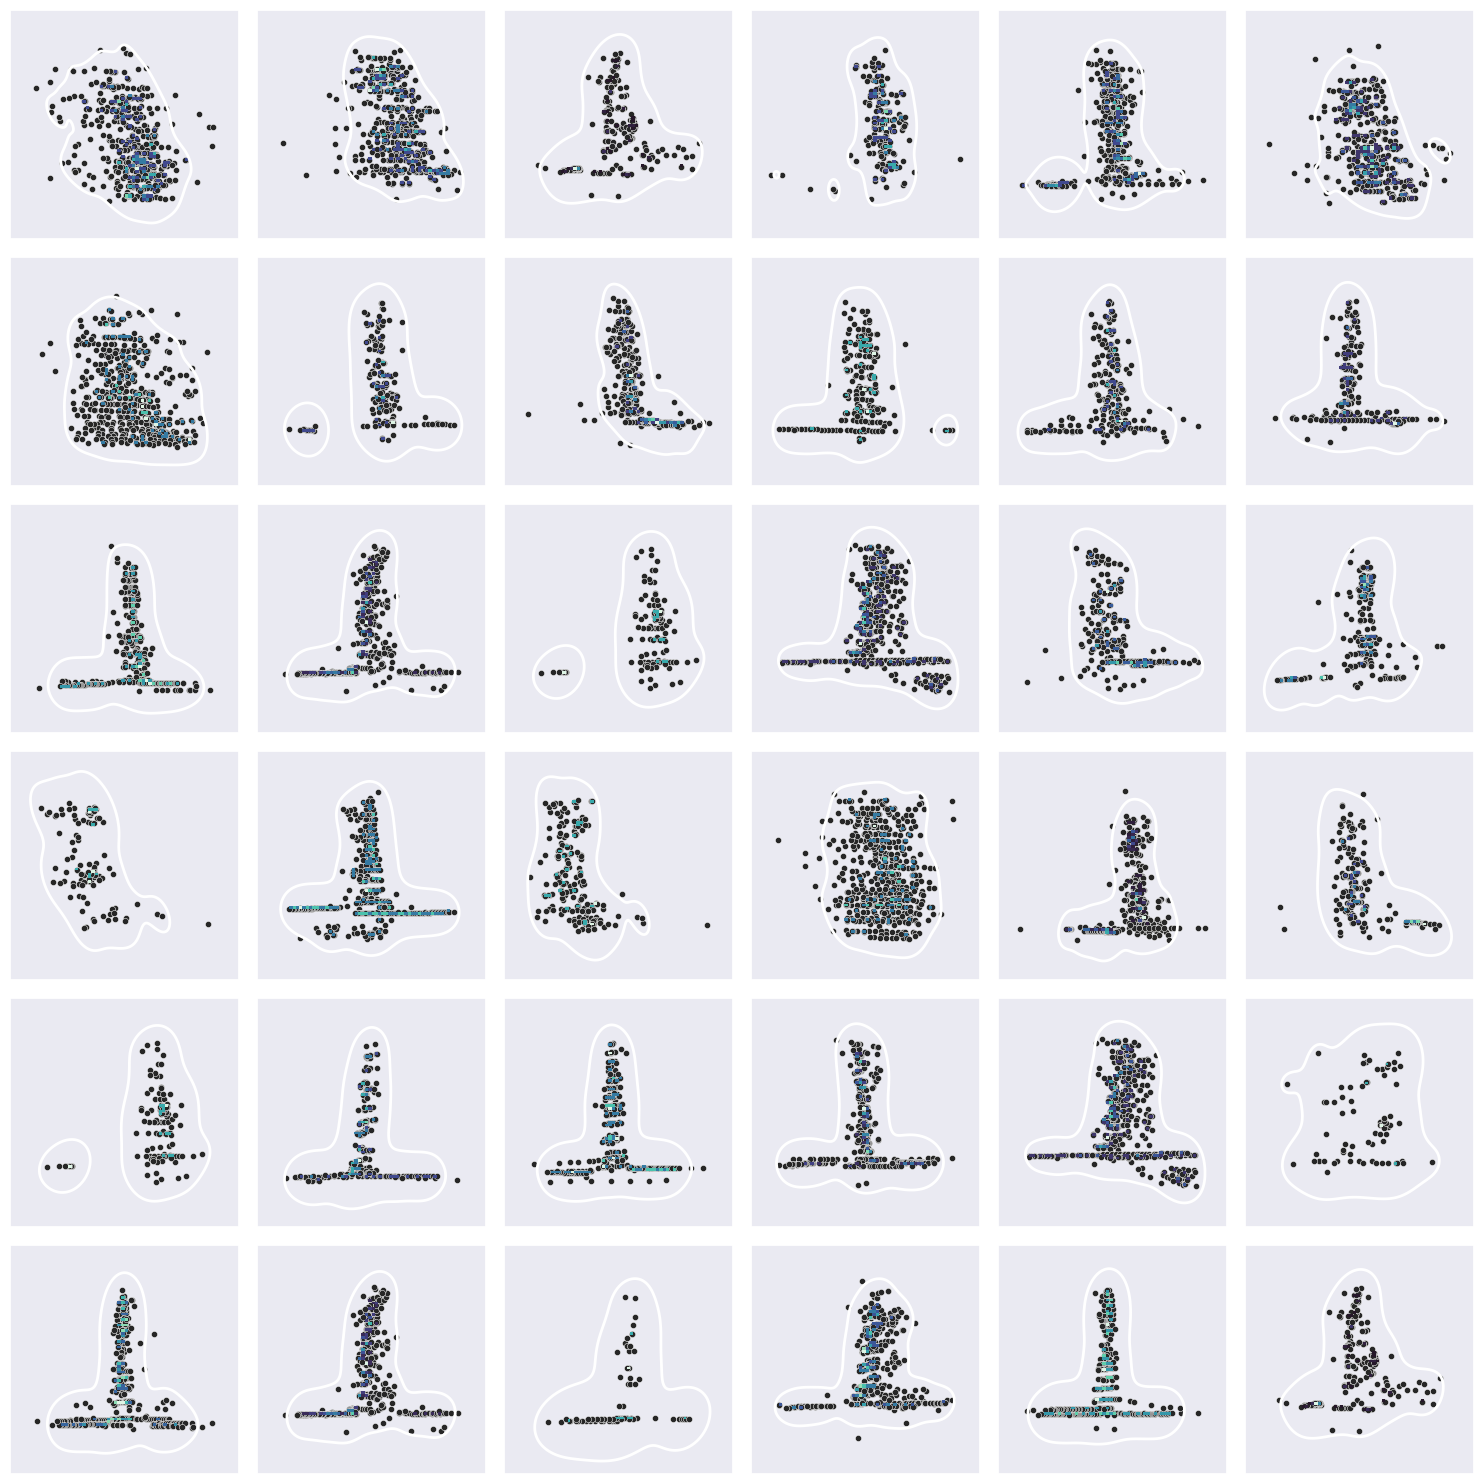

In [60]:
df = pd.read_csv('/home/victhor/bcnemotorsport/ws/src/ec-thor/data/clusters_reconstruction.csv')
# Configurar el estilo de seaborn (opcional)
sns.set_theme(style="dark")

# Configuración de la parrilla
num_rows, num_cols = 6, 6
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterar sobre cada id y plotearlo en la parrilla
unique_ids = df['id'].unique()
size = []
for i, cluster_id in enumerate(select_ids):
    cluster_data = df[df['id'] == cluster_id]
    x, z = cluster_data['y'].values, cluster_data['z'].values
    size.append(len(x))
    row, col = divmod(i, num_cols)
    
    # Draw a combo histogram and scatterplot with density contours
    sns.scatterplot(x=x, y=z, s=20, color=".15", ax=axes[row, col])
    sns.histplot(x=x, y=z, bins=50, pthresh=.3, cmap="mako", ax=axes[row, col])
    sns.kdeplot(x=x, y=z, levels=2, color="w", linewidths=2, ax=axes[row, col])

    # Ocultar marcas de ejes para una presentación más limpia
    axes[row, col].set_xticks([])
    axes[row, col].set_yticks([])

# Ajustes de diseño
plt.tight_layout()
plt.show()